# Early-Stage Alzheimer's Disease Prediction Using Machine Learning Models

[ISTRAŽIVAČKI RAD](https://www.frontiersin.org/articles/10.3389/fpubh.2022.853294/full#B21)  

[DATASET](https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers/data?select=oasis_longitudinal.csv)

#### UČITAVANJE PODATAKA

In [1]:
import pandas as pd
import numpy as np

In [2]:
X = pd.read_csv("dataset/oasis_longitudinal.csv")
X.shape

(373, 15)

U skupu podataka dostupno 373 zapisa sa 15 značajki.

#### INICIJALI POGLED NA PODATKE

In [3]:
X.head(7)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462


In [4]:
X.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

Pojašnjenja značajki:
 - Subject ID - jedinstveni identifikator osobe, u prikupljanju podataka sudjelovalo je 150 osoba pa tako postoji 150 različitih Subject ID vrijednosti
 - MRI ID - jedinstveni identifikator MRI skeniranja
 - Group - oznaka, kategorička varijabla
    - "Demented"
    - "Nondemented"
    - "Converted"
 - Visit - redni broj skeniranja osobe
      - cjelobrojna vrijednost
 - MR Delay - vremensko kašnjenje MR (kontrast)
      - cjelobrojna vrijednost
 - M/F - spol osobe, kategorička varijabla 
      - 'M' - muškarac
      - 'F'- žena'
 - Hand - dominantna ruka osobe
     - R - dešnjaci 
     - L- ljevaci
 - Age - dob osobe
     - cjelobrojna vrijednost
 - EDUC - broj godina obrazovanja
     - cjelobrojna vrijednost
 - SES - socioekonomski status, kategorička varijabla
 - MMSE - Mini mental state examination score - mjera kognitivnih sposobnosti subjekta 
    - MMSE <= 9  - ozbiljno kognitivno oštećenje
    - 10 <= MMSE <= 18 - umjereno kognitivno oštećenje
    - 19 <= MMSE <= 23 -  blago kognitivno oštećenje
    - 24 <= MMSE <= 30 - normalne kognitivne sposobnosti
 - CDR - rang kliničke demencije
   - 0 = odsutnost demencije
   - 1 = demencija slabo prisutna
   - 2= umjerena demencija
   - 3 = ozbiljna demencija
   - 4 = težak oblik demencije
   - 5 = terminalna demecija
 - eTIV - procjena intrakranijalnog volumena 
    - cjelobrojna vrijednost
 - nWBV - normalizirani volumen  mozga
    - float vrijednost
 - ASF - Atlas Scale Volume
    - normalizacijska mjera temeljena na standarniziraciji ukupnog intrakranijalnog volumena
    - float vrijednost

In [5]:
X.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


#### MONOTONI ATRIBUTI

Pogledajmo postoje li u promatranom skupu podataka monotoni podaci.

In [6]:
X.nunique()

Subject ID    150
MRI ID        373
Group           3
Visit           5
MR Delay      201
M/F             2
Hand            1
Age            39
EDUC           12
SES             5
MMSE           18
CDR             4
eTIV          286
nWBV          136
ASF           265
dtype: int64

In [7]:
X.loc[:, 'MRI ID']

0      OAS2_0001_MR1
1      OAS2_0001_MR2
2      OAS2_0002_MR1
3      OAS2_0002_MR2
4      OAS2_0002_MR3
           ...      
368    OAS2_0185_MR2
369    OAS2_0185_MR3
370    OAS2_0186_MR1
371    OAS2_0186_MR2
372    OAS2_0186_MR3
Name: MRI ID, Length: 373, dtype: object

Vidimo da je značajka MRI ID monotona, no zbog lakšeg dohvaćanja potrebnih podataka kasnije ostavit ćemo ju u skupu podataka.

Također iz gornjeg ispisa primjećujemo da značajka Hand ima samo jednu vrijednost i to je R. To je u skladu s očekivanjima budući da je su podaci prikupljeni isključivo na dešnjacima. 

Zbog navedenog značajku ćemo izbaciti iz skupa podataka.


In [8]:
X = X.drop(columns=['Hand'])
X

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


#### NEDOSTAJEĆE VRIJEDNOSTI

In [9]:
X.info()
X.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Age         373 non-null    int64  
 7   EDUC        373 non-null    int64  
 8   SES         354 non-null    float64
 9   MMSE        371 non-null    float64
 10  CDR         373 non-null    float64
 11  eTIV        373 non-null    int64  
 12  nWBV        373 non-null    float64
 13  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(4)
memory usage: 40.9+ KB


Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

Iz gornjeg ispisa vidljivo je da većina vrijednosti nije nedostajuća. Međutim kod značajki SES i MMSE vidimo da postoji redom 19 i 2 nedostajuća zapisa. Govoreći u terminima postotaka možemo reći da značajka SES ima 5% nedostajećih vrijednosti, a značajka MMSE 0.5% nedostajećih vrijednosti.

Pogledajmo detaljnije te zapise.

In [10]:
X.loc[X.SES.isna(), :]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,75,16,NaN,27.0,1.0,1372,0.710,1.279
134,OAS2_0063,OAS2_0063_MR1,Demented,1,0,F,80,12,NaN,30.0,0.5,1430,0.737,1.228
135,OAS2_0063,OAS2_0063_MR2,Demented,2,490,F,81,12,NaN,27.0,0.5,1453,0.721,1.208
207,OAS2_0099,OAS2_0099_MR1,Demented,1,0,F,80,12,NaN,27.0,0.5,1475,0.762,1.190
208,OAS2_0099,OAS2_0099_MR2,Demented,2,807,F,83,12,NaN,23.0,0.5,1484,0.750,1.183


Opećnito govoreći problem nedostajećih podataka moguće je rješiti:
- interpolacijom - u ovom konkretnom niti za jednu značajku nema prevište smisla
- izbacivanje cijele značajke - također u ovoj primjeni nema smisla jer relativno malo primjera ima nedostajeću vrijednost
- nadopunjavanje nedostajećih vrijednosti srednjom vrijednošću - također nije opcija
- izbacivanje zapisa - ovo je najbolja opcija za našu primjenu jer govorimo o relativno malom skupu podataka


**Napomena** : Budući da postoje 2 zapisa za koje su i značajke SES i MMSE nedostajeće dovoljno je izbaciti samo 19 zapisa za koje je značajka SES nedostajeća.

In [11]:
X_noNaN = X.copy()

X_noNaN = X_noNaN.loc[X_noNaN.SES.notnull(), :]


#### PRETVORTBA KATEGORIČKIH VARIJABLI

S obzirom da iz istraživačkog rada nije baš jasno koja značajka je korištena kao oznaka primjera, mi ćemo s obzirom na grafičke prikaze u radu i nedostatak interpretacije slučaja "Converted" osloniti na značajku CDR - Clinical Dementia Rating. Pomoću te značajke konstruirat ćemo zanačajku Custom Group koja će imati vrijednost 0 s interpretacijom "Nondemented" za slučajeve gdje je vrijednost CDR 0, a za slučajeve gdje je CDR veći od 0 vrijednost Custom Group bit će 1 s interpretacijom da je ispitanik pripadnik grupe "Demented". 

**Custom Group**:
- 0 => "Nondemented"
- 1 => "Demented"


Osim toga kategoričku varijablu M/F ćemo pomoću LabelEncodera preslikati na sljedeći način:
- M => 1
- F => 0

In [12]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X_preprocessed = X_noNaN.copy()

# Transforming M/F variable
leMF = LabelEncoder()
leMF.fit(X_preprocessed.loc[:, 'M/F'])
X_preprocessed.loc[:, 'M/F'] = leMF.transform(X_preprocessed.loc[:, 'M/F'])

# Creating Custom Group 
X_preprocessed.loc[X_preprocessed['CDR'] == 0, 'Custom Group'] = 0
X_preprocessed.loc[X_preprocessed['CDR'] > 0, 'Custom Group'] = 1


X_preprocessed.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Custom Group
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883,0.0
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876,0.0
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444,0.0
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,0,90,18,3.0,27.0,0.0,1200,0.718,1.462,0.0
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039,0.0
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,1,83,12,4.0,29.0,0.5,1701,0.711,1.032,1.0
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,1,85,12,4.0,30.0,0.0,1699,0.705,1.033,0.0
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,0,93,14,2.0,30.0,0.0,1272,0.698,1.380,0.0
14,OAS2_0008,OAS2_0008_MR2,Nondemented,2,742,0,95,14,2.0,29.0,0.0,1257,0.703,1.396,0.0
15,OAS2_0009,OAS2_0009_MR1,Demented,1,0,1,68,12,2.0,27.0,0.5,1457,0.806,1.205,1.0


####  VIZUALIZACIJA I STRŠEĆI PODACI

In [32]:
# X.loc[:, 'Subject ID'].unique()
# X_vis = X_preprocessed.loc[X_preprocessed['MRI ID'].str.contains("_MR1"), :]

X_vis = X_preprocessed.copy()

X_firstScan = X_preprocessed.loc[X_preprocessed['MRI ID'].str.contains("_MR1"), :]

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

##### SPOL

Pogledajmo najprije koliki postotak u našim podacima čine žene, a koliki muškarci. 

Koristit ćemo pitni graf za vizualizaciju.

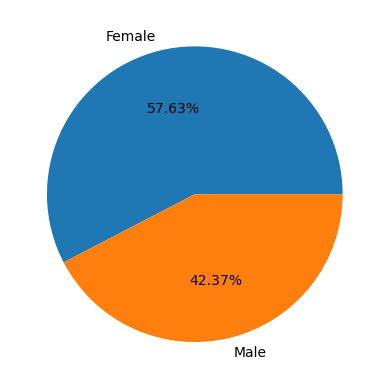

In [35]:
count_per_sex = X_vis.groupby('M/F').count().loc[:, 'Custom Group'].values
names = X_vis.groupby('M/F').count().loc[:, 'Custom Group'].index.values
percent = (count_per_sex/len(X_preprocessed)) * 100

plt.pie(percent, labels=["Female", "Male"], autopct='%.2f%%')
plt.show()

Iz gornjeg grafa vidimo da je skupu podataka prevladava ženski spol sa udjelom od 58%

##### PRISUTNOST ALZHEIMEROVE BOLESTI PO SPOLOVIMA

Pogledajmo sada koliko podataka je označeno s "Demented" (oznaka 1), a koliko s "Nondemented" (oznaka 0).

Također odmah ćemo razdvojiti podatke po spolu tako da ćemo za vizualizaciju koristiti posloženi dijagram.

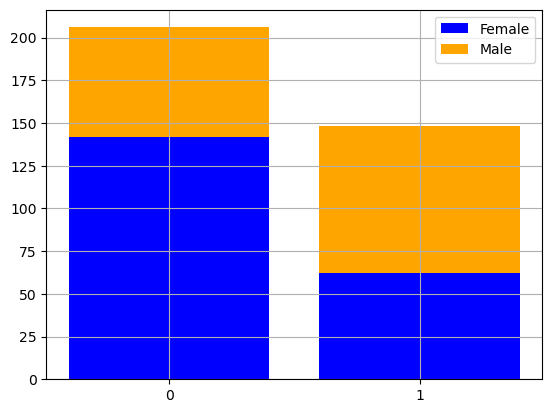

In [20]:
count_per_group_male = X_vis.loc[X_vis['M/F'] == 1, :].groupby('Custom Group').count().loc[:, 'Subject ID'].values
count_per_group_female = X_vis.loc[X_vis['M/F'] == 0, :].groupby('Custom Group').count().loc[:, 'Subject ID'].values


group_names = X_vis.groupby('Custom Group').count().index.values


# plot
plt.bar(group_names, count_per_group_female, color='blue', label='Female')
plt.bar(group_names, count_per_group_male, color='orange', label='Male', bottom = count_per_group_female)


plt.legend(loc='best')
plt.xticks(np.arange(0, 2, 1))
plt.grid()
plt.show()





Vidimo da je više primjera klasificirano kao "Nondemented" i da je općenito više žena u ovoj klasi. Nekako možemo onda naslutiti da je možda vjerojatnije da muškarci budu dijagnosticirani s Alzheimerovom bolešću.  

##### DOB

Iz gornje deskriptivne analize vidimo da je minimalni broj godina ispitanika u skupu podataka 60, a maksimalni broj godina 98. 

Podatke o dobi vizualzirat ćemo tako da napravimo histogram i razdvojimo podatke s obzirom na prisutnost Alzheimerove bolesti.

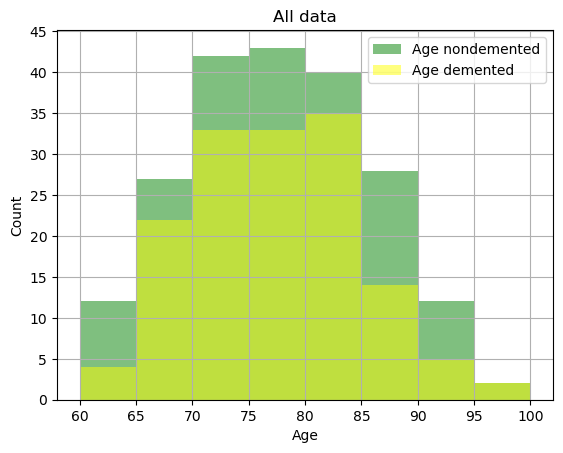

In [102]:
#fig, ax = plt.subplots(1,2, figsize=(10,5))


# First scan
#ax[0].set_title("First Scan")
#ax[0].hist(X_firstScan[X_firstScan['Custom Group'] == 0].Age, bins=8, range=(60,100), alpha=0.5, color='green', label="Age nondemented")
#ax[0].hist(X_firstScan[X_firstScan['Custom Group'] == 1].Age, bins=8, range=(60,100), alpha=0.5, color='yellow', label="Age demented")
#ax[0].legend(loc='best')
#ax[0].set_xlabel('Age')
#ax[0].set_ylabel('Count')
#ax[0].set_yticks(np.arange(0,20,2))
#ax[0].grid() */


# All data
plt.title("All data")
plt.hist(X_vis[X_vis['Custom Group'] == 0].Age, bins=8, range=(60,100), alpha=0.5, color='green', label="Age nondemented")
plt.hist(X_vis[X_vis['Custom Group'] == 1].Age, bins=8, range=(60,100), alpha=0.5, color='yellow', label="Age demented")
plt.legend(loc='best')
plt.xlabel('Age')
plt.ylabel('Count')
plt.yticks(np.arange(0,50,5))
plt.grid()





##### OBRAZOVANJE I SOCIOEKONOMSKI STATUS



Značajke EDUC i SES koje predstavljaju obrazovanje i socioekonomski status prikazane su grafom raspršenja u usporedbi s brojem godina. Dodatno drugačijom bojom prikazani su pacijenti kojima je dijagnosticirana Alzheimerova bolest.

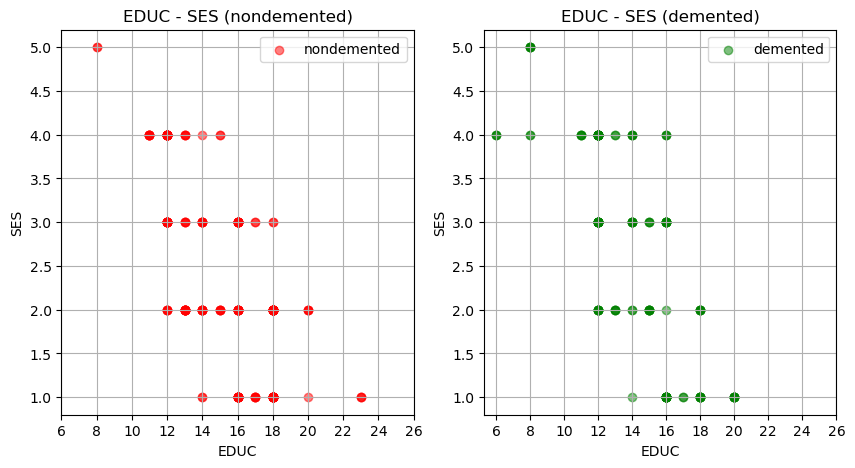

In [100]:
#mask
mask_demented = X_vis['Custom Group'] == 1

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].set_title('EDUC - SES (nondemented)')
ax[0].scatter(X_vis.loc[~mask_demented, 'EDUC'], X_vis.loc[~mask_demented, 'SES'], alpha=0.5, c='r', label="nondemented")
ax[0].legend(loc='best')
ax[0].set_xticks(np.arange(6,28,2))
ax[0].set_xlabel('EDUC')
ax[0].set_ylabel('SES')
ax[0].grid()

ax[1].set_title('EDUC - SES (demented)')
ax[1].scatter(X_vis.loc[mask_demented, 'EDUC'], X_vis.loc[mask_demented, 'SES'], alpha=0.5, c='g', label="demented")
ax[1].legend(loc='best')
ax[1].legend(loc='best')
ax[1].set_xticks(np.arange(6,28,2))
ax[1].set_xlabel('EDUC')
ax[1].set_ylabel('SES')
ax[1].grid()





Iz gornjih grafova ne možemo baš naslutiti postoji li kakva veza između značajki EDUC, SES i dijagnosticiranja Alzheimerove bolesti.

##### KOGNITIVNE SPOSOBNOSTI (MMSE)

Značajka MMSE vizualzirana je pomoću boxplota kako bismo vidjeli postoje li neke stršeće vrijednosti u skupu podataka te pomoću violinskog plota gdje su podaci još dodatno razdvojeni po klasama s obzirom na prisutnost Alzheimerove bolesti.

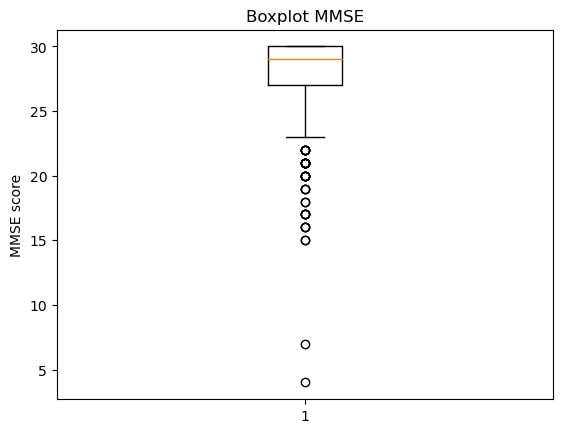

In [118]:
plt.boxplot(X_vis.MMSE)
plt.title('Boxplot MMSE')
plt.ylabel('MMSE score')
plt.show()


Analizom boxplota zaključuje se da postoje stršeće vrijednosti u značajki MMSE, ali kako je to mjera kognitivnih sposobnosti koja se prikuplja upitnikom valjano je pretpostavit kako su ove stršeće vrijednosti točne i da nisu rezultat šuma u podacima.

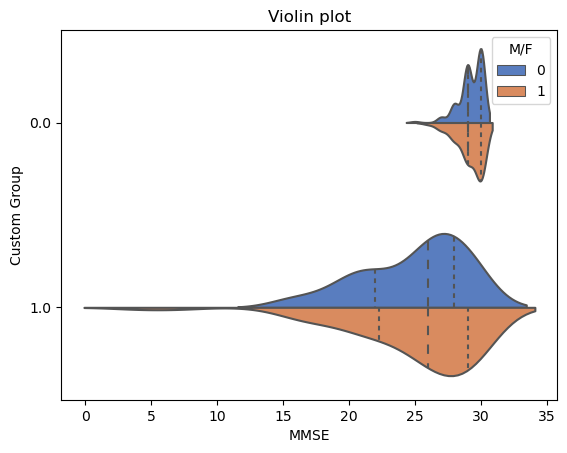

In [133]:
plt.title('Violin plot')
sns.violinplot(x="MMSE", y="Custom Group",hue="M/F" ,orient="h", data=X_vis, palette="muted", split=True, inner="quartile")
plt.show()


Iz gornjeg violinskog grafa zaključujemo da i muškarci i žene koji ne pokazuju simptome Alzheimerove bolesti postižu MMSE vrijednost u intervalu od 26 do 30 što ukazuje na normalne kognitivne sposobnosti. Osobe koje pokazuju simptome Alzheimerove bolesti s druge strane imaju rasprešeniju MMSE vrijednost s medijanom oko 25 što upućuje na smanjenu kognitivnu sposobnost. 
Iz prikaza se može iščitati kako oba spola postižu podjednake vrijednosti u  značajki MMSE.

##### PROCJENJENI INTERKRANIJALNI VOLUMEN (eTIV)

Za vizualziaciju ove značajke koristi se boxplot i violinski plot.

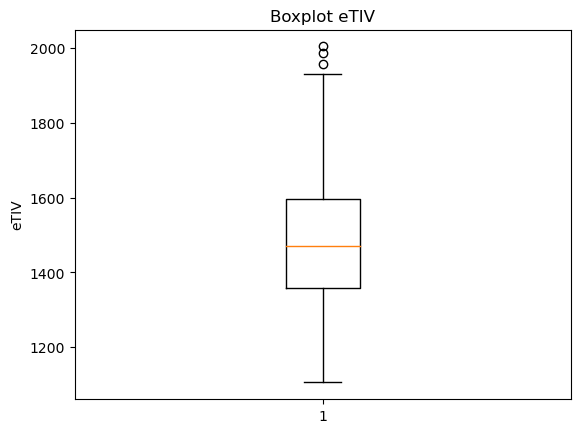

In [134]:
plt.boxplot(X_vis.eTIV)
plt.title('Boxplot eTIV')
plt.ylabel('eTIV')
plt.show()

Iz boxplota je vidljivo da ova značajka nema mnogo stršećoh vrijednosti - radi se o 3 primjera i oni ne odskaču toliko od ostatka skupa. S obzirom da se radi o značajki koja procjenjuje intrakranijalni volumen validna je pretpostavka da ti podaci nisu rezultat šuma u podacima ili krivo unesenih podataka prilikom formiranja skupa podataka.

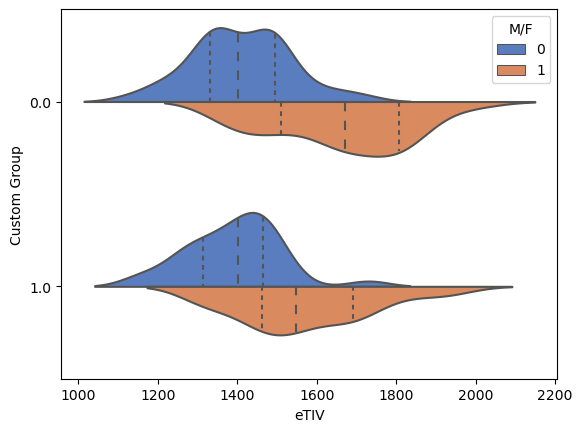

In [68]:
sns.violinplot(x="eTIV", y="Custom Group",hue="M/F" ,orient="h", data=X_vis, palette="muted", split=True, inner="quartile")
plt.show()

Gornji prikaz upućuje na to da muškarci općenito imaju veći intrakranijalni volumen što je u skladu s istraživanjima iz područja biomedicine.  
Gornji graf ukazuje i na činjenicu da muškarci kojima je dijagnosticirana Alzheimerova bolest imaju manji intrakranijalni volumen od muškaraca kojima nije dijagnosticirana Alzheimerova bolest.

##### NORMALIZIRANI VOLUMEN CIJELOG MOZGA (nWBV)

Za vizualizaciju ove značajke koristi se boxplot i violinski plot.

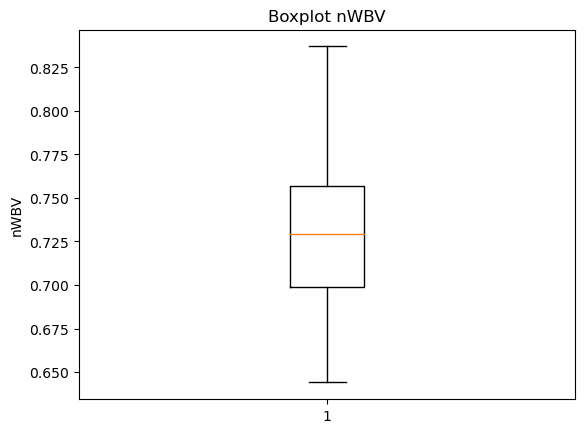

In [136]:
plt.boxplot(X_vis.nWBV)
plt.title('Boxplot nWBV')
plt.ylabel('nWBV')
plt.show()

Iz boxplota vidimo da ova značajka nema stršećih vrijednosti.

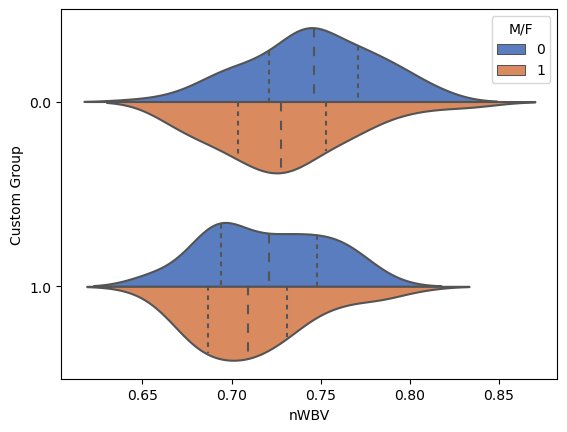

In [137]:
sns.violinplot(x="nWBV", y="Custom Group",hue="M/F" ,orient="h", data=X_vis, palette="muted", split=True, inner="quartile")
plt.show()

Iz violinskog prikaza značajke nWBV vidljivo je da grupa ljudi kojima nije dijagnosticirana Alzheimerova bolest imaju veću vrijednost ove značajke. Drugim riječima ljudi koji nemaju dijagnosticiranu Alzheimerovu bolest imaju veći volumen mozga. Ovo proizlazi iz načina na koji Alzheimerova bolest napada stanice mozga.  

##### Atlas skalirajući faktor (ASF)

Vizualizacija ove značajke napravljena je pomoću boxplota i violinskog grafa.

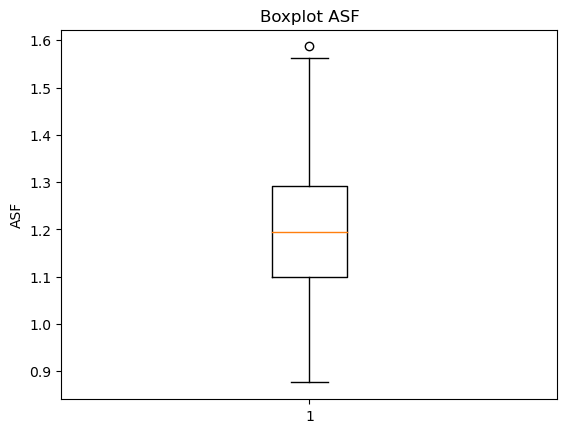

In [138]:
plt.boxplot(X_vis.ASF)
plt.title('Boxplot ASF')
plt.ylabel('ASF')
plt.show()

Iz kutijastkog grafa vidljivo je da postoji jedna stršeća vrijednost.

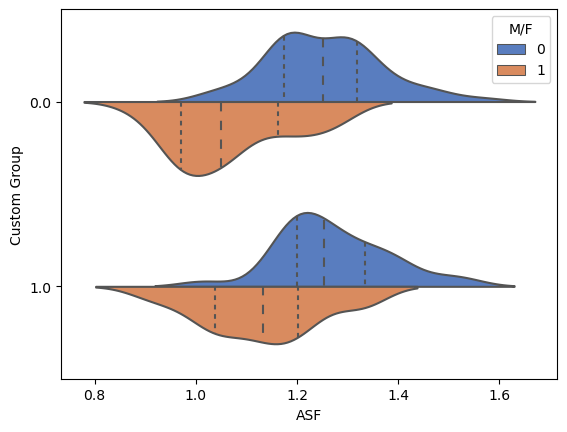

In [139]:
sns.violinplot(x="ASF", y="Custom Group",hue="M/F" ,orient="h", data=X_vis, palette="muted", split=True, inner="quartile")
plt.show()

Gornji prikaz upućuje na to da grupa kojoj je dijagnosticirana Alzheimerova bolest i grupa kojoj nije dijagnosticirana bolest imaju podjednak ASF.  
Također može se naslutiti da žene imaju vežu vrijednost ASF od muškaraca

#### KORELACIJA ZNAČAJKI

In [153]:
X_preprocessed.loc[:, ~X_preprocessed.columns.isin(["Subject ID", "MRI ID","Group", "Visit", "MR Delay"])].corr(method='spearman')

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Custom Group
M/F,1.000000,-0.013492,0.097586,-0.047150,-0.151398,0.251937,0.552727,-0.261036,-0.552449,0.269906
Age,-0.013492,1.000000,-0.042745,-0.044696,-0.042701,-0.041385,0.046114,-0.496085,-0.046090,-0.020640
EDUC,0.097586,-0.042745,1.000000,-0.723371,0.206856,-0.171596,0.249642,-0.023468,-0.250075,-0.179602
SES,-0.047150,-0.044696,-0.723371,1.000000,-0.183062,0.107132,-0.255197,0.107732,0.255700,0.122560
MMSE,-0.151398,-0.042701,0.206856,-0.183062,1.000000,-0.664660,0.014583,0.283559,-0.014724,-0.625202
CDR,0.251937,-0.041385,-0.171596,0.107132,-0.664660,1.000000,0.048340,-0.362139,-0.048497,0.972346
eTIV,0.552727,0.046114,0.249642,-0.255197,0.014583,0.048340,1.000000,-0.203302,-0.999988,0.029955
nWBV,-0.261036,-0.496085,-0.023468,0.107732,0.283559,-0.362139,-0.203302,1.000000,0.203161,-0.332723
ASF,-0.552449,-0.046090,-0.250075,0.255700,-0.014724,-0.048497,-0.999988,0.203161,1.000000,-0.030124
Custom Group,0.269906,-0.020640,-0.179602,0.122560,-0.625202,0.972346,0.029955,-0.332723,-0.030124,1.000000


Iz prikazane matrice korelacije vidljivo je da su jako korelirani sljedeći parovi značajki:
- SES i EDUC
- ASF i eTIV

Korelacija između socioekonomskog statusa i obrazovanja nekako proizlazi iz stvarnog svijeta. Logično je da će obrazovanija osoba biti većeg socioekonomskog statusa.

Korelacija između značajki ASF i eTIV proizlazi iz činjenice da se ASF vrijednost računa iz eTIV vrijednosti.  

Ove značajke zasad neće biti uklonjene iz skupa podataka, no kod odabira i treniranja modela strojnog učenja treba imati na umu da su ovi parovi značajka međusobno korelirani.